# Data Kung Fu with Pandas

## Import the libraries we'll need.

In [1]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

## Let's read some data!

In [3]:
raw_dataframe = pd.read_csv("data/mydata.csv")

In [4]:
raw_dataframe.head(3)

,Month,Year,Taxpayer Number,Taxpayer Name,Taxpayer Address,Taxpayer City,Taxpayer State,Taxpayer Zip,Taxpayer County,Outlet Number,Location Name,Location Address,Location City,Location State,Location Zip,Location County,Location Room Capacity,Location Tot Room Receipts,Location Taxable Receipts,Taxpayer Geolocation,Location Geolocation
0,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373.0,178,155,(PB 114) TERRY L CARTER,2012 HWY 361 #114,PORT ARANSAS,TX,78373,178.0,1,$6010.00,$6010.00,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 #114\nPORT ARANSAS, TX 78373\n"
1,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373.0,178,156,(PB 205) LARRY OR VICKY MURPHY,2012 HWY 361 # 205,PORT ARANSAS,TX,78373,178.0,1,$9855.00,$9855.00,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 # 205\nPORT ARANSAS, TX 78373\n"
2,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373.0,178,194,(PB101) STEVEN AND MARY MORGAN,2012 HWY 361 #101,PORT ARANSAS,TX,78373,178.0,1,$9425.00,$9425.00,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 #101\nPORT ARANSAS, TX 78373\n"


In [5]:
raw_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17977 entries, 0 to 17976
Data columns (total 21 columns):
Month                         17977 non-null int64
Year                          17977 non-null int64
Taxpayer Number               17977 non-null int64
Taxpayer Name                 17977 non-null object
Taxpayer Address              17977 non-null object
Taxpayer City                 17977 non-null object
Taxpayer State                17975 non-null object
Taxpayer Zip                  17975 non-null float64
Taxpayer County               17977 non-null int64
Outlet Number                 17977 non-null int64
Location Name                 17977 non-null object
Location Address              17977 non-null object
Location City                 17977 non-null object
Location State                17977 non-null object
Location Zip                  17977 non-null int64
Location County               17975 non-null float64
Location Room Capacity        17977 non-null int64
Location Tot

## Let's clean our data.

In [6]:
dataframe = raw_dataframe.copy()

# Convert _Taxpayer Zip_ to an integer.
dataframe['Taxpayer Zip'] = dataframe['Taxpayer Zip'].fillna(0.0).astype(int)

# Convert _Location County_ to an integer.
dataframe['Location County'] = dataframe['Location County'].fillna(0.0).astype(int)

# Convert _Location Tot Room Receipts_ to a float.
dataframe['Location Tot Room Receipts'] = \
    dataframe['Location Tot Room Receipts'] \
        .replace('[\$,]', '', regex=True).astype(float, inplace=True)

# Convert _Location Tot Room Receipts_ to a float.
dataframe['Location Taxable Receipts'] = \
    dataframe['Location Taxable Receipts'] \
        .replace('[\$,]', '', regex=True).astype(float, inplace=True)

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17977 entries, 0 to 17976
Data columns (total 21 columns):
Month                         17977 non-null int64
Year                          17977 non-null int64
Taxpayer Number               17977 non-null int64
Taxpayer Name                 17977 non-null object
Taxpayer Address              17977 non-null object
Taxpayer City                 17977 non-null object
Taxpayer State                17975 non-null object
Taxpayer Zip                  17977 non-null int64
Taxpayer County               17977 non-null int64
Outlet Number                 17977 non-null int64
Location Name                 17977 non-null object
Location Address              17977 non-null object
Location City                 17977 non-null object
Location State                17977 non-null object
Location Zip                  17977 non-null int64
Location County               17977 non-null int64
Location Room Capacity        17977 non-null int64
Location Tot Roo

## Exploratory Data Analysis (EDA)

In [8]:
dataframe.head(3)

,Month,Year,Taxpayer Number,Taxpayer Name,Taxpayer Address,Taxpayer City,Taxpayer State,Taxpayer Zip,Taxpayer County,Outlet Number,Location Name,Location Address,Location City,Location State,Location Zip,Location County,Location Room Capacity,Location Tot Room Receipts,Location Taxable Receipts,Taxpayer Geolocation,Location Geolocation
0,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373,178,155,(PB 114) TERRY L CARTER,2012 HWY 361 #114,PORT ARANSAS,TX,78373,178,1,6010.0,6010.0,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 #114\nPORT ARANSAS, TX 78373\n"
1,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373,178,156,(PB 205) LARRY OR VICKY MURPHY,2012 HWY 361 # 205,PORT ARANSAS,TX,78373,178,1,9855.0,9855.0,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 # 205\nPORT ARANSAS, TX 78373\n"
2,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373,178,194,(PB101) STEVEN AND MARY MORGAN,2012 HWY 361 #101,PORT ARANSAS,TX,78373,178,1,9425.0,9425.0,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 #101\nPORT ARANSAS, TX 78373\n"


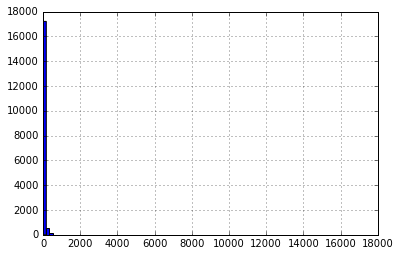

In [9]:
# Hmm, _Location Room Capacity_ looks suspicious
dataframe['Location Room Capacity'].hist(bins=100)

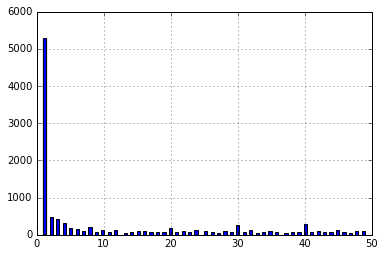

In [10]:
rows_of_interest = (dataframe['Location Room Capacity'] < 50)
dataframe[rows_of_interest]['Location Room Capacity'].hist(bins=100)

In [11]:
# How many of these suspicious observations do we have?
(dataframe['Location Room Capacity'] == 1).sum()

5276

<b><font color='indianred'>############################</font><b>

In [33]:
# IGNORE THIS FOR NOW!
# Keep commented out. We'll come back here later.
#
print("Orig size:", dataframe.shape)
dataframe = dataframe[dataframe['Location Room Capacity'] > 1]
print("New size:", dataframe.shape)

Orig size: (17977, 21)
New size: (12701, 21)


<b><font color='indianred'>############################</font><b>

### Visualization (histograms and scatterplots)

#### Number of States Represented

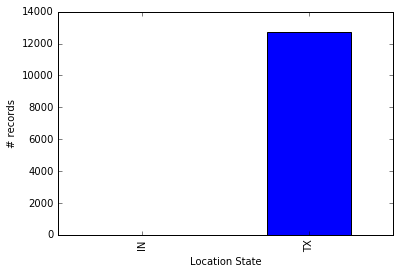

In [34]:
# How many states do I got here?
agg = dataframe.groupby('Location State').apply(len)
agg.plot(kind='bar').set_ylabel('# records')

In [35]:
dataframe['Location State'].value_counts()

TX    12699
IN        2
Name: Location State, dtype: int64

In [36]:
texas_df = dataframe[dataframe['Location State'] == 'TX']

#### Number of Cities Represented
How many unique cities are represented?

In [37]:
texas_df['Location City'].describe()

count       12699
unique        658
top       HOUSTON
freq         1120
Name: Location City, dtype: object

#### Histogram: Number of unique hotels in each city

In [38]:
city_counts = texas_df.groupby('Location City')['Taxpayer Number'].nunique()
city_counts.head()

Location City
ABILENE          41
ADDISON          20
ALAMO             6
ALAMO HEIGHTS     1
ALBA              2
Name: Taxpayer Number, dtype: int64

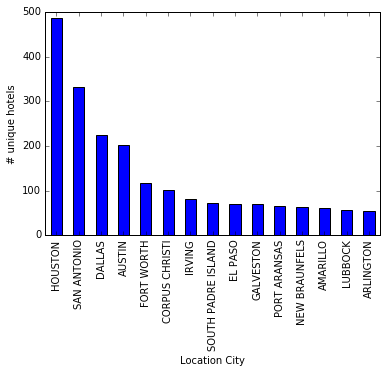

In [39]:
city_counts.sort_values(axis=0, ascending=False, inplace=True)
top_cities = city_counts > 50
city_counts[top_cities].plot(kind='bar').set_ylabel('# unique hotels')

#### Exploring the numeric columns

In [40]:
numeric_columns = ['Month', 'Year', 'Outlet Number', 'Location Room Capacity',
                   'Location Tot Room Receipts', 'Location Taxable Receipts']

In [41]:
# Let's see some stats
texas_df[numeric_columns].describe()

,Month,Year,Outlet Number,Location Room Capacity,Location Tot Room Receipts,Location Taxable Receipts
count,12699.000000,12699.0,12699.000000,12699.000000,1.269900e+04,1.269900e+04
mean,7.502795,2015.0,13.092842,75.641547,1.428364e+05,1.233902e+05
std,0.500012,0.0,43.592113,241.979413,3.544799e+05,2.903193e+05
min,7.000000,2015.0,1.000000,2.000000,0.000000e+00,0.000000e+00
25%,7.000000,2015.0,1.000000,23.000000,1.454726e+04,1.094312e+04
50%,8.000000,2015.0,1.000000,54.000000,5.573664e+04,4.325000e+04
75%,8.000000,2015.0,2.000000,92.000000,1.559256e+05,1.362628e+05
max,8.000000,2015.0,371.000000,17211.000000,1.552075e+07,7.142023e+06


#### Pairplot over a few numeric columns-of-interest

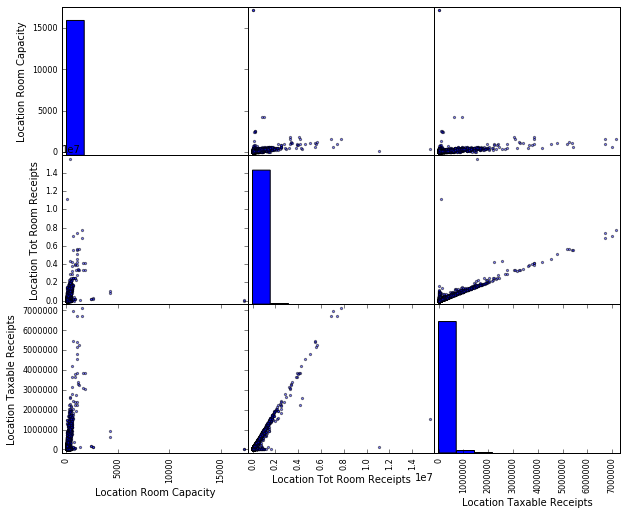

In [42]:
cols_of_interest = ['Location Room Capacity', 'Location Tot Room Receipts',
                    'Location Taxable Receipts']
scatter_matrix(texas_df[cols_of_interest], figsize=(10, 8));

#### Compare two cities: Scatterplot 'Location Room Capacity' vs 'Location Tot Room Receipts' for each city

/Users/reabx/Library/Python/3.5/lib/python/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/reabx/Library/Python/3.5/lib/python/site-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


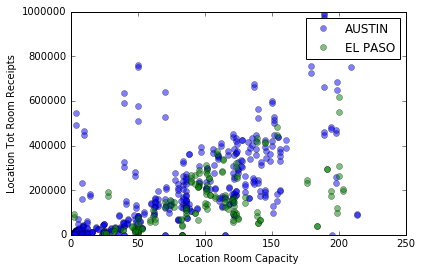

In [43]:
cities_of_interest = ['AUSTIN', 'EL PASO']

# Scatter plot by city.
for city in cities_of_interest:
    city_mask = (texas_df['Location City'] == city)
    size_mask = (texas_df['Location Room Capacity'] < 220)
    plt.plot(texas_df[city_mask][size_mask]['Location Room Capacity'],
             texas_df[city_mask][size_mask]['Location Tot Room Receipts'],
             linestyle='',
             marker='o',
             alpha=.5,
             label=city)
plt.xlabel('Location Room Capacity')
plt.ylabel('Location Tot Room Receipts')
plt.legend(numpoints=1)

#### Histogram of every numeric column

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ebc50b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110a65438>]], dtype=object)

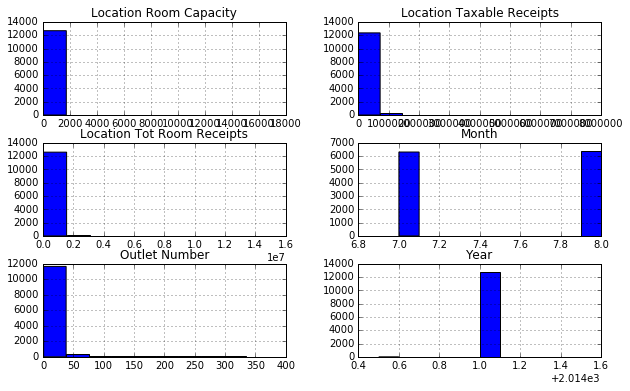

In [44]:
# Here's another one-liner:
texas_df[numeric_columns].hist(bins=10, figsize=(10, 6))

#### Years and Months, what do we have of each?

In [45]:
texas_df['Year'].value_counts()

2015    12699
Name: Year, dtype: int64

In [46]:
texas_df['Month'].value_counts()

8    6385
7    6314
Name: Month, dtype: int64

#### Histogram: Avg 'room capacity' per city (top cities only)

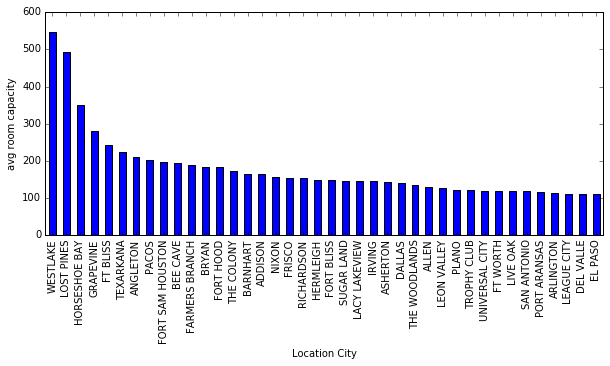

In [47]:
city_counts = texas_df.groupby('Location City')['Location Room Capacity'].mean()
city_counts.sort_values(axis=0, ascending=False, inplace=True)
city_counts[city_counts>110].plot(kind='bar', figsize=(10, 4)).set_ylabel('avg room capacity')

#### Histogram: Avg income per room per night per city (top cities only)

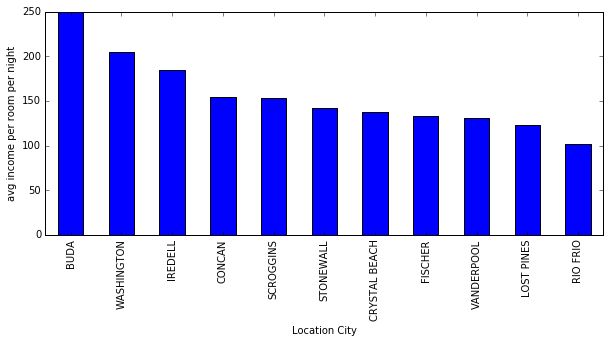

In [48]:
num_days = 31 + 31  # <-- both July and August each have 31 days in them.

cities = texas_df.groupby('Location City')
city_receipts = cities['Location Tot Room Receipts'].sum()
city_rooms = cities['Location Room Capacity'].sum()
city_income_per_room_per_night = city_receipts / city_rooms / num_days
city_income_per_room_per_night.sort_values(axis=0, ascending=False, inplace=True)
most_profitable_cities = city_income_per_room_per_night > 100
city_income_per_room_per_night[most_profitable_cities].plot(kind='bar', figsize=(10, 4)) \
    .set_ylabel('avg income per room per night')

#### RED ALERT: What's up with SOUTHLAKE?

In [ ]:
texas_df[texas_df['Location City'] == 'SOUTHLAKE']

Wait. Is this bad data?<br>
Let's check:
http://www3.hilton.com/en/hotels/texas/hilton-dallas-southlake-town-square-DFWSLHF/index.html

#### Is there much of a difference between the month of July and the month of August?

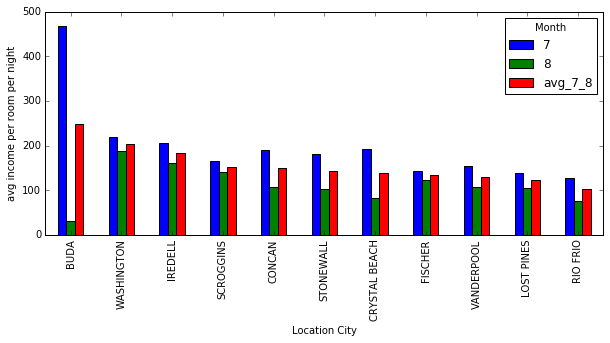

In [49]:
# How does the specific month affect the avg income per room per night?

cities = texas_df.groupby(['Location City', 'Month'])
city_receipts = cities['Location Tot Room Receipts'].sum()
city_rooms = cities['Location Room Capacity'].sum()
city_income_per_room_per_night = city_receipts / city_rooms / num_days
city_income_per_room_per_night = city_income_per_room_per_night.unstack()
city_income_per_room_per_night['avg_7_8'] = (city_income_per_room_per_night[7] + \
                                             city_income_per_room_per_night[8]) / 2
city_income_per_room_per_night.sort_values(by='avg_7_8', ascending=False, inplace=True)
most_profitable_cities = city_income_per_room_per_night['avg_7_8'] > 100
city_income_per_room_per_night[most_profitable_cities].plot(kind='bar', figsize=(10, 4)) \
    .set_ylabel('avg income per room per night')

In [50]:
# Seems July (7) was a better month for the top cities than August (8). Let's see if this
# was overall true for the entire dataset.
print('July Avg:', city_income_per_room_per_night[7].mean())
print('Aug Avg: ', city_income_per_room_per_night[8].mean())

July Avg: 25.1900819334
Aug Avg:  20.4024339199


####  _Enough for today (for now)_